<a href="https://colab.research.google.com/github/yerinsally/BDA/blob/main/%EC%A0%95%EC%98%88%EB%A6%B0_0305_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

필수과제 
- 트위터에 대통령 선거 관련된 문자열 데이터 분석하기 
- 대통령 이름, 여러 후보자 이름 등
1. 정규식으로 전처리, 실제 의미있는 키워드의 빈도 추출
2. 후보자와 관련이 가장 깊은 키워드가 무엇인지 찾기 
3. 간단히 시각화하여 실제로 어떤 후보자가 어떤 키워드를 가지는지 확인

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_csv('/content/drive/MyDrive/[BDAA 5기] 데이터 분석 기초반/데이터셋/tweet_jae.csv')
data

,status_id,screen_name,created_at,text
0,1295242650363154433,park_pyung,2020-08-17 06:14:46,-&gt; (지난 7개월 동안은 엎치락뒤치락 안 했는데?) 본격화되지 않았던 것\n...
1,1294137207121297409,Otranso2,2020-08-14 05:02:08,"""차기선호도 이재명 19% 이낙연 17%…첫 역전""(종합)https://t.co/n..."
2,1294285873027014656,hyoker3690,2020-08-14 14:52:53,"안철수 시즌2라~~~ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ [‘이낙연 대세론’ 흔들…이재명,..."
3,1294154164272939009,hyoker3690,2020-08-14 06:09:31,조작미터도 모자라 갤럽까지 제대로 미쳤군.\n대통령과 당 지지율이 떨어졌는데\n이재...
4,1294092935877652480,Sunny38251,2020-08-14 02:06:13,@yonhaptweet SNS로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이...
...,...,...,...,...
8561,1293704470996557824,QVh027,2020-08-13 00:22:36,이재명이가 추진하고 있는 토지 공개념화에 대한 대법원 판례가 규제를 인정했다고 해서...
8562,1293706115528527873,hezii631,2020-08-13 00:29:08,인물열전] 이재명에게서 노무현을 보다…“진짜 민주주의를 향한 위대한 발걸음”\n온라...
8563,1293704734507859969,junsun88,2020-08-13 00:23:39,@Jaemyung_Lee 믿을 사람은 이재명뿐이요 ㅡ토지거래허가제 당장해서 실...
8564,1293704250019549184,hjg002,2020-08-13 00:21:43,"뻐꾹이와 이재명, 김경수까지 변호를? 그 피데스 동지들이 법을 유린하고 있다 많이 ..."


In [3]:
# 결측치 확인
data.isna().sum()

status_id      0
screen_name    0
created_at     0
text           0
dtype: int64

In [4]:
# 한글만 남기고 모두 삭제
data['text'] = data['text'].str.replace(pat=r"[^ㄱ-ㅣ가-힣\s]", repl= r'', regex=True)
data

,status_id,screen_name,created_at,text
0,1295242650363154433,park_pyung,2020-08-17 06:14:46,지난 개월 동안은 엎치락뒤치락 안 했는데 본격화되지 않았던 것\n\n 이재명은 적...
1,1294137207121297409,Otranso2,2020-08-14 05:02:08,차기선호도 이재명 이낙연 첫 역전종합
2,1294285873027014656,hyoker3690,2020-08-14 14:52:53,안철수 시즌라ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이낙연 대세론 흔들이재명 여권 추락 속 ...
3,1294154164272939009,hyoker3690,2020-08-14 06:09:31,조작미터도 모자라 갤럽까지 제대로 미쳤군\n대통령과 당 지지율이 떨어졌는데\n이재명...
4,1294092935877652480,Sunny38251,2020-08-14 02:06:13,로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이낙연\n당연히 이낙연 아닌가...
...,...,...,...,...
8561,1293704470996557824,QVh027,2020-08-13 00:22:36,이재명이가 추진하고 있는 토지 공개념화에 대한 대법원 판례가 규제를 인정했다고 해서...
8562,1293706115528527873,hezii631,2020-08-13 00:29:08,인물열전 이재명에게서 노무현을 보다진짜 민주주의를 향한 위대한 발걸음\n온라인 \n...
8563,1293704734507859969,junsun88,2020-08-13 00:23:39,믿을 사람은 이재명뿐이요 ㅡ토지거래허가제 당장해서 실거주가 아니면 못사게 ...
8564,1293704250019549184,hjg002,2020-08-13 00:21:43,뻐꾹이와 이재명 김경수까지 변호를 그 피데스 동지들이 법을 유린하고 있다 많이 배워...


In [5]:
# 문자 길이 컬럼 생성
data['length'] = data['text'].str.len()
data

,status_id,screen_name,created_at,text,length
0,1295242650363154433,park_pyung,2020-08-17 06:14:46,지난 개월 동안은 엎치락뒤치락 안 했는데 본격화되지 않았던 것\n\n 이재명은 적...,145
1,1294137207121297409,Otranso2,2020-08-14 05:02:08,차기선호도 이재명 이낙연 첫 역전종합,21
2,1294285873027014656,hyoker3690,2020-08-14 14:52:53,안철수 시즌라ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이낙연 대세론 흔들이재명 여권 추락 속 ...,51
3,1294154164272939009,hyoker3690,2020-08-14 06:09:31,조작미터도 모자라 갤럽까지 제대로 미쳤군\n대통령과 당 지지율이 떨어졌는데\n이재명...,85
4,1294092935877652480,Sunny38251,2020-08-14 02:06:13,로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이낙연\n당연히 이낙연 아닌가...,58
...,...,...,...,...,...
8561,1293704470996557824,QVh027,2020-08-13 00:22:36,이재명이가 추진하고 있는 토지 공개념화에 대한 대법원 판례가 규제를 인정했다고 해서...,159
8562,1293706115528527873,hezii631,2020-08-13 00:29:08,인물열전 이재명에게서 노무현을 보다진짜 민주주의를 향한 위대한 발걸음\n온라인 \n...,98
8563,1293704734507859969,junsun88,2020-08-13 00:23:39,믿을 사람은 이재명뿐이요 ㅡ토지거래허가제 당장해서 실거주가 아니면 못사게 ...,54
8564,1293704250019549184,hjg002,2020-08-13 00:21:43,뻐꾹이와 이재명 김경수까지 변호를 그 피데스 동지들이 법을 유린하고 있다 많이 배워...,62


(array([ 638., 1873., 1450.,  956.,  793.,  644.,  506.,  506.,  664.,
         536.]),
 array([  4. ,  20.4,  36.8,  53.2,  69.6,  86. , 102.4, 118.8, 135.2,
        151.6, 168. ]),
 <BarContainer object of 10 artists>)

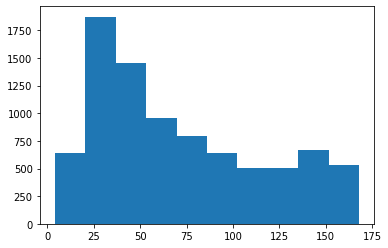

In [6]:
# 문자길이 시각화
import matplotlib.pyplot as plt
plt.hist(data['length'])

In [7]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 40.7 MB/s eta 0:00:00


In [8]:
import konlpy
konlpy.__version__

'0.6.0'

In [9]:
from konlpy.tag import Okt
from collections import Counter

In [10]:
# text 컬럼
text = pd.DataFrame(data['text'])
text

,text
0,지난 개월 동안은 엎치락뒤치락 안 했는데 본격화되지 않았던 것\n\n 이재명은 적...
1,차기선호도 이재명 이낙연 첫 역전종합
2,안철수 시즌라ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이낙연 대세론 흔들이재명 여권 추락 속 ...
3,조작미터도 모자라 갤럽까지 제대로 미쳤군\n대통령과 당 지지율이 떨어졌는데\n이재명...
4,로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이낙연\n당연히 이낙연 아닌가...
...,...
8561,이재명이가 추진하고 있는 토지 공개념화에 대한 대법원 판례가 규제를 인정했다고 해서...
8562,인물열전 이재명에게서 노무현을 보다진짜 민주주의를 향한 위대한 발걸음\n온라인 \n...
8563,믿을 사람은 이재명뿐이요 ㅡ토지거래허가제 당장해서 실거주가 아니면 못사게 ...
8564,뻐꾹이와 이재명 김경수까지 변호를 그 피데스 동지들이 법을 유린하고 있다 많이 배워...


In [11]:
from konlpy.tag import Twitter
twt = Twitter()

/usr/local/lib/python3.9/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [12]:
all_word = [] # 이 리스트에 명사 담기

for n in range(len(data)):
  text = data['text'].iloc[n]
  words = twt.pos(text)

  for i, j in words:
    if j == 'Noun':
      all_word.append(i)
  
print(all_word)

['지난', '개월', '동안', '엎치락뒤치락', '안', '본격', '것', '이재명', '적극', '행보', '이낙연', '행보', '최근', '현안', '대한', '태도', '한번', '보라', '참고', '사랑', '교회', '목사', '관련', '이낙연', '의원', '직접', '기한', '상태', '이재명', '경기도', '대변인', '통해', '언급', '차기', '선호', '이재명', '이낙연', '첫', '역전', '종합', '안철수', '시즌', '이낙연', '세론', '이재명', '여권', '추락', '속', '홀로', '날', '조작', '모자라', '갤럽', '제대로', '대통령', '당', '지지율', '이재명', '오른', '이유', '뭔가', '조작', '이재명', '이낙연', '차기', '정치인', '선호', '역전', '로', '폭우', '이재명', '수해', '현장', '구슬', '땀', '이낙연', '이낙연', '전', '고추', '점', '이재명', '지지', '자건', '이낙연', '지지', '자건', '문재인', '뭐', '어쩌', '이낙연', '회피', '이재명', '뻥카', '유튜브', '결론', '안철수', '대표', '이재명', '안철수', '이낙연', '안철수', '대도', '정치권', '화두', '지지율', '희비', '여권', '중진', '부동산', '정책', '영향', '이재명', '이낙연', '박주민', '민주당', '김', '남국', '이낙연', '의원', '현안', '대해', '태도', '보이', '이재명', '도지사', '사이다', '얘기', '보', '지지율', '것', '유권자', '문제해결', '능력', '가르마', '리더십', '찢빠', '구', '찢', '정치', '갤럽', '민주당', '지층', '이낙연', '이재명', '통합', '지층', '이낙연', '명', '정의당', '지층', '이낙연', '명', '무당', '층', '이낙연', '명', '호남', '이낙연', '명', '부울경

In [14]:
# 단어의 빈도수를 집계하여 자주 등장한 단어 Top 10 추출
all_word_df = pd.DataFrame({'words':all_word, 'count':len(all_word)*[1]})
all_word_df = all_word_df.groupby('words').count()
all_word_df.sort_values('count', ascending=False).head(10)

,count
words,
이재명,10404
이낙연,1240
것,1126
민주당,1026
지사,1022
경기도,984
지지율,815
대통령,719
사람,685


In [37]:
all_word_df.sort_values('count', ascending=False).tail(10)

,count
words,
없다뇬,1
없는겐,1
내후년,1
업채,1
업주,1
낼걸,1
업무방해죄,1
업무방해,1
낼름,1
